# Logistic Regression

Logistic Regression is a statistical and machine learning algorithm used for binary classification problems (where the output has only two possible outcomes, such as Yes/No, 0/1, True/False). Unlike linear regression, which predicts continuous values, logistic regression predicts probabilities.

### Types of classification

1️⃣ Binary Classification

Binary Classification is a type of supervised learning where the output variable (target) has only two possible classes. It predicts whether a given input belongs to one of two categories.

Example: Spam Detection: Email is Spam (1) or Not Spam (0).

2️⃣ Multi-Class Classification

Multi-Class Classification is a type of supervised learning where the output variable (target) has more than two mutually exclusive classes. The model assigns an input to one class out of multiple possible classes.

Example: Movie Genre Classification: Classifying a movie as Action, Comedy, Drama, or Thriller.

## Sigmoid Function
$$ S(x) = \frac{1}{1 + e^{-x}} $$


replacing x with the linear equation
$$ S(x) = \frac{1}{1 + e^{(-mx+b)}} $$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Text(0, 0.5, 'Age')

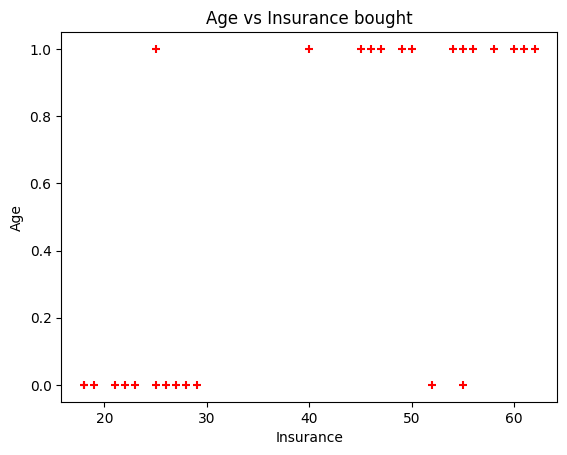

In [3]:
plt.scatter(df.age,df.bought_insurance,marker = '+', color = 'red')
plt.title("Age vs Insurance bought")
plt.xlabel("Insurance")
plt.ylabel("Age")

In [4]:
df.shape

(27, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[["age"]],df.bought_insurance,test_size = 0.1)

In [7]:
x_test

,age
16,25
14,49
12,27


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
model.predict(x_test)

array([0, 1, 0])

In [12]:
model.score(x_test,y_test)

0.6666666666666666

In [13]:
model.predict_proba(x_test)

array([[0.93978359, 0.06021641],
       [0.2314242 , 0.7685758 ],
       [0.91824261, 0.08175739]])

In [14]:
model.predict(pd.DataFrame([[66]],columns = ['age']))

array([1])

# Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

- 1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- 2. Plot bar charts showing impact of employee salaries on retention
- 3. Plot bar charts showing corelation between department and employee retention
- 4. Now build logistic regression model using variables that were narrowed down in step 1
- 5. Measure the accuracy of the model

In [15]:
df = pd.read_csv("HR_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df.shape

(14999, 10)

## Data Exploration and Visualization

In [17]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [18]:
retained = df[df.left == 0]
retained.shape

(11428, 10)

### Average numbers for all columns

In [19]:
df.groupby('left').mean(numeric_only = True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

- **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

- **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

- **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention



<Axes: xlabel='salary'>

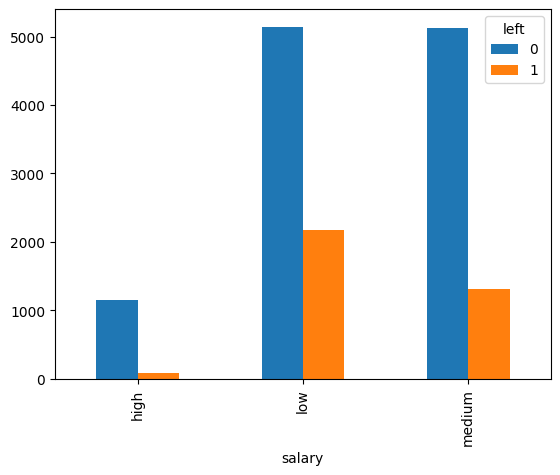

In [20]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

Above bar chart shows employees with high salary are less likely to leave the company.

### Department wise employee retention rate

<Axes: xlabel='Department'>

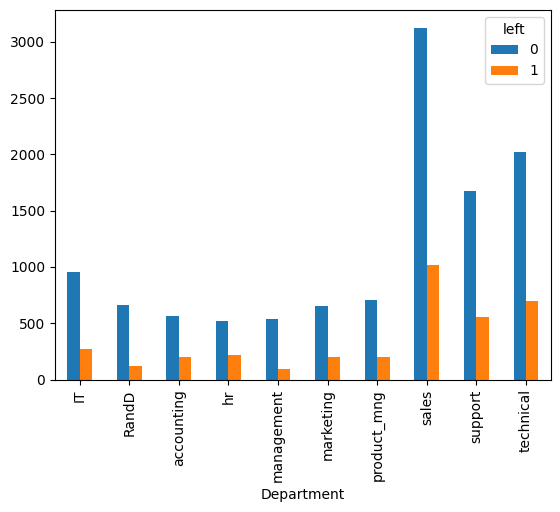

In [21]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

From the above charts it is clear that department doesn't have much impact on employee retension

#### The variables that have direct impact are

- **Satisfaction Level**
- **Avg Monthly Hours**
- **Promotion Last 5 Years**
- **Salary**

#### So we will use this as independent variables

In [22]:
df2 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [23]:
salary_dummies = pd.get_dummies(df2.salary, prefix = 'salary').astype(int)
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [24]:
df_with_dummies = pd.concat([df2,salary_dummies],axis = 'columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we have to remove the salary column as it has string data

In [25]:
df_with_dummies.drop('salary',axis = 'columns',inplace = True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [26]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [27]:
y = df.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3)

In [30]:
model = LogisticRegression(max_iter = 500)

In [31]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [32]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], shape=(10500,))

In [33]:
y_test

7967     0
14687    1
9081     0
589      1
343      1
        ..
12194    1
1990     1
6907     0
12025    1
8578     0
Name: left, Length: 10500, dtype: int64

In [34]:
model.score(x_test,y_test)

0.788952380952381